In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scipy
from matplotlib.patches import Patch

In [2]:
# import data
path='C:/Users/alexs/Dropbox (MIT)/Buonassisi-Group/ASD Team/Archerfish/05_Data/OSF_data/BO_EXPERIMENT_032021/' # set path to data folder
impath='C:/Users/alexs/Dropbox (MIT)/Buonassisi-Group/ASD Team/Archerfish/07_Figure_Graphs/Working_Folder/'
bo = pd.read_csv(path+'inkjet/inkjet_for_plotting_032021.csv')
bom=pd.read_csv(path+'microfluidic/microfluidic_for_plotting_032021.csv')
cawe_geom=pd.read_csv(path+'microfluidic/microfluidic_drop_diam_032021.csv')
drops_per_row=pd.read_csv(path+'microfluidic/microfluidic_drop_per_row_032021.csv')

# inkjet
me=['EI','MPI','LCB']
for y in range(len(me)):
    globals()['bo'+me[y]]=bo[bo['Method']==me[y]].reset_index(drop=True)
    globals()['bo'+me[y]+'_min']=[1]
    for n in range(globals()['bo'+me[y]].shape[0]):
        if globals()['bo'+me[y]]['Min Function Val'][n]<globals()['bo'+me[y]+'_min'][n]:
            globals()['bo'+me[y]+'_min'].append(globals()['bo'+me[y]]['Min Function Val'][n])
        else:
            globals()['bo'+me[y]+'_min'].append(globals()['bo'+me[y]+'_min'][n])
# microfluidic
for y in range(len(me)):
    globals()['bom'+me[y]]=bom[bom['Method']==me[y]].reset_index(drop=True)
    globals()['bom'+me[y]+'_min']=[1]
    for n in range(globals()['bom'+me[y]].shape[0]):
        if n>0 and globals()['bom'+me[y]]['Min Function Val'][n]<globals()['bom'+me[y]+'_min'][n]:
            globals()['bom'+me[y]+'_min'].append(globals()['bom'+me[y]]['Min Function Val'][n])
        else:
            globals()['bom'+me[y]+'_min'].append(globals()['bom'+me[y]+'_min'][n])

In [3]:
def avoid_singular(x1,x2,y,res=100):
    X1, X2 = np.meshgrid(np.linspace(np.min(x1),np.max(x1),res),np.linspace(np.min(x2),np.max(x2),res))
    cv_x_temp0=x1
    cv_x_temp1=x2
    cv_y_temp=y
    for i in range(len(x1)):
        for j in range(len(x1)):
            if cv_x_temp0[i]==cv_x_temp0[j] and cv_x_temp1[i]==cv_x_temp1[j] and i!=j:
                if cv_x_temp0[i] < cv_x_temp0[j]: # want to remove failed prints over good prints
                    cv_x_temp0[j]=np.nan
                    cv_x_temp1[j]=np.nan
                    cv_y_temp[j]=np.nan
                else:
                    cv_x_temp0[i]=np.nan
                    cv_x_temp1[i]=np.nan
                    cv_y_temp[i]=np.nan
    threshold = np.nanmean(cv_y_temp) + 4 * np.nanstd(cv_y_temp) # remove points 4 std above the mean
    for i in range(len(cv_y_temp)):
        if cv_y_temp[i] > threshold:
            cv_y_temp[i]=np.nan
            cv_x_temp0[i]=np.nan
            cv_x_temp1[i]=np.nan
    cv_x_temp0=cv_x_temp0[~np.isnan(cv_x_temp0)]
    cv_x_temp1=cv_x_temp1[~np.isnan(cv_x_temp1)]
    cv_y_temp=cv_y_temp[~np.isnan(cv_y_temp)]
    df_rbf=scipy.interpolate.Rbf(cv_x_temp0,cv_x_temp1,cv_y_temp,function='linear')
    return X1, X2, df_rbf(X1,X2)
# normalization function
def normalize_it(array):
    return (array - np.min(array))/((np.max(array-np.min(array))))
def unnormalize_it(array,prior_min, prior_max):
    return array * (prior_max - prior_min) + prior_min

In [7]:
# Create the MATLAB parula colormap

from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]
# parula_map = LinearSegmentedColormap.from_list('parula', np.flip(cm_data))
parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

def reverse_colourmap(cmap, name = 'my_cmap_r'):
    """
    In: 
    cmap, name 
    Out:
    my_cmap_r

    Explanation:
    t[0] goes from 0 to 1
    row i:   x  y0  y1 -> t[0] t[1] t[2]
                   /
                  /
    row i+1: x  y0  y1 -> t[n] t[1] t[2]

    so the inverse should do the same:
    row i+1: x  y1  y0 -> 1-t[0] t[2] t[1]
                   /
                  /
    row i:   x  y1  y0 -> 1-t[n] t[2] t[1]
    """        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

parula_map_r = reverse_colourmap(parula_map, name='parula_map_r')

# Inkjet Figures

Text(67, -0.35, '$\\bf{Batch\\ 4}$')

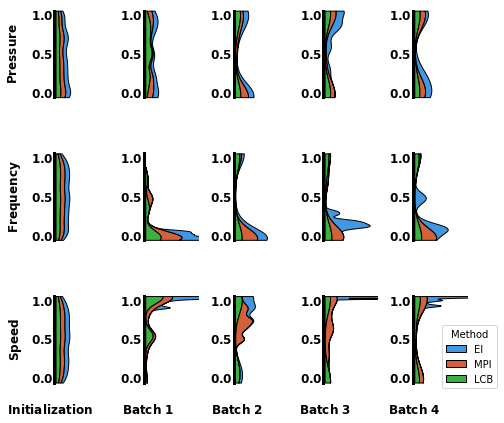

In [8]:
from matplotlib.patches import ConnectionPatch
fig = plt.figure(figsize=(8, 7))

gs = fig.add_gridspec(3, 4*5)
gs.update(hspace=0.5,wspace=0.1)
dmin=-2.7
dlim=4
pal = ['#147edb','#c93b0c','#0b9e0e'] # EI, MPI, LCB
init_set=4 # grid spaces used for initialization round
optim_set=4 # grid spaces used for optimization round
inita=0
optima=0
rounds=['Initialization','Round 1','Round 2','Round 3', 'Round 4']
var=['Pressure','Frequency','Speed']
l=['p','f','s']

for u in range(5):
    if u > 0:
        inita=1
    if u > 1:
        optima+=1
    lower=init_set*inita+optima*optim_set
    upper=init_set+u*optim_set

    globals()['r'+str(u)]=bo.loc[bo['Round']==rounds[u],:]
    # position [0,u]
    if u == 0:
        globals()['p1'+str(u)]= fig.add_subplot(gs[0, lower:upper])
    else:
        globals()['p1'+str(u)]= fig.add_subplot(gs[0, lower:upper],sharey=p10)
    globals()['p1'+str(u)].axis('off')
    globals()['p2'+str(u)] = fig.add_subplot(gs[0, lower:upper-1],sharey=p10)
    globals()['p2'+str(u)].patch.set_alpha(0.0)
    globals()['p2'+str(u)].axis('off')
    s1=sns.kdeplot(data=globals()['r'+str(u)],y='Pressure',ax=globals()['p1'+str(u)],hue='Method',palette=pal,fill=True,alpha=0.8,clip=[0.,1.],multiple='stack',bw_adjust=0.5)
    s1.legend_.remove()
    globals()['p1'+str(u)].set_xlim([dmin,dlim])
    globals()['p2'+str(u)].set_xlim([-3.5,9])
    globals()['p1'+str(u)].plot((-0.1,-0.1),(0,1),c='k',linewidth=3)
    globals()['p2'+str(u)].text(-1.5,0,r'$\bf{0.0}$',fontsize=12)
    globals()['p2'+str(u)].text(-1.5,0.9,r'$\bf{1.0}$',fontsize=12)
    globals()['p2'+str(u)].text(-1.5,0.45,r'$\bf{0.5}$',fontsize=12)
    
    # position [1,u]
    if u == 0:
        globals()['f1'+str(u)]= fig.add_subplot(gs[1, lower:upper])
    else:
        globals()['f1'+str(u)]= fig.add_subplot(gs[1, lower:upper],sharey=f10)
    globals()['f1'+str(u)].axis('off')
    globals()['f2'+str(u)] = fig.add_subplot(gs[1, lower:upper-1],sharey=f10)
    globals()['f2'+str(u)].patch.set_alpha(0.0)
    globals()['f2'+str(u)].axis('off')
    s2=sns.kdeplot(data=globals()['r'+str(u)],y='Frequency',ax=globals()['f1'+str(u)],hue='Method',palette=pal,fill=True,alpha=0.8,clip=[0.,1.],multiple='stack',bw_adjust=0.5)
    if u > 0:
        s2.legend_.remove()
    else:
        s2.legend_.set_bbox_to_anchor((5.5, -0.8))
    globals()['f1'+str(u)].set_xlim([dmin,dlim])
    globals()['f2'+str(u)].set_xlim([-3.5,9])
    globals()['f1'+str(u)].plot((-0.1,-0.1),(0,1),c='k',linewidth=3)
    globals()['f2'+str(u)].text(-1.5,0,r'$\bf{0.0}$',fontsize=12)
    globals()['f2'+str(u)].text(-1.5,0.9,r'$\bf{1.0}$',fontsize=12)
    globals()['f2'+str(u)].text(-1.5,0.45,r'$\bf{0.5}$',fontsize=12)
    
    # position [2,u]
    if u == 0:
        globals()['s1'+str(u)]= fig.add_subplot(gs[2, lower:upper])
    else:
        globals()['s1'+str(u)]= fig.add_subplot(gs[2, lower:upper],sharey=s10)
    globals()['s1'+str(u)].axis('off')
    globals()['s2'+str(u)] = fig.add_subplot(gs[2, lower:upper-1],sharey=s10)
    globals()['s2'+str(u)].patch.set_alpha(0.0)
    globals()['s2'+str(u)].axis('off')
    s3=sns.kdeplot(data=globals()['r'+str(u)],y='Speed',ax=globals()['s1'+str(u)],hue='Method',palette=pal,fill=True,alpha=0.8,clip=[0.,1.],multiple='stack',bw_adjust=0.5)
    s3.legend_.remove()
    globals()['s1'+str(u)].set_xlim([dmin,dlim])
    globals()['s2'+str(u)].set_xlim([-3.5,9])
    globals()['s1'+str(u)].plot((-0.1,-0.1),(0,1),c='k',linewidth=3)
    globals()['s2'+str(u)].text(-1.5,0,r'$\bf{0.0}$',fontsize=12)
    globals()['s2'+str(u)].text(-1.5,0.9,r'$\bf{1.0}$',fontsize=12)
    globals()['s2'+str(u)].text(-1.5,0.45,r'$\bf{0.5}$',fontsize=12)
# plot text
p20.text(-6,0.20,r'$\bf{Pressure}$',fontsize=12,rotation=90)
f20.text(-6,0.15,r'$\bf{Frequency}$',fontsize=12,rotation=90)
s20.text(-6,0.32,r'$\bf{Speed}$',fontsize=12,rotation=90)
s20.text(-6,-0.35,r'$\bf{Initialization}$',fontsize=12)
s20.text(16,-0.35,r'$\bf{Batch\ 1}$',fontsize=12)
s20.text(33,-0.35,r'$\bf{Batch\ 2}$',fontsize=12)
s20.text(50,-0.35,r'$\bf{Batch\ 3}$',fontsize=12)
s20.text(67,-0.35,r'$\bf{Batch\ 4}$',fontsize=12)
# plt.savefig(impath+'kde_flow_R3.png',dpi=300)

In [5]:
cv_x_tem=bo.loc[:,['Pressure','Frequency','Speed','Method']]
cv_y_tem=bo.loc[:,['Min Function Val']]
meth='EI'

cv_y_tem=cv_y_tem[cv_x_tem['Method']==meth]
cv_x_tem=cv_x_tem[cv_x_tem['Method']==meth]
cv_x_tem.reset_index(drop=True,inplace=True)
cv_y_tem.reset_index(drop=True,inplace=True)
if meth=='LCB':
    drop_list=[10,15]# list of rows to drop
    cv_x_tem=cv_x_tem.drop(drop_list)
    cv_y_tem=cv_y_tem.drop(drop_list)
elif meth=='EI':
    drop_list=[15]# list of rows to drop
    cv_x_tem=cv_x_tem.drop(drop_list)
    cv_y_tem=cv_y_tem.drop(drop_list)
elif meth=='MPI':
    drop_list=[15]# list of rows to drop
    cv_x_tem=cv_x_tem.drop(drop_list)
    cv_y_tem=cv_y_tem.drop(drop_list)

res=100
x1=np.linspace(0,1,res)
x2=np.linspace(0,1,res)
X1, X2 = np.meshgrid(x1,x2)

feas=0.75 # score threshold for feasibility
for n in range(3):
    cv_x_temp0=np.copy(cv_x_tem.iloc[:,n])
    cv_x_temp1=np.copy(cv_x_tem.iloc[:,(n+1)%3])
    cv_y_temp=np.copy(cv_y_tem.iloc[:,0])
    for i in range(cv_x_tem.shape[0]):
        for j in range(cv_x_tem.shape[0]):
            if cv_x_temp0[i]==cv_x_temp0[j] and cv_x_temp1[i]==cv_x_temp1[j] and i!=j:
                if cv_y_temp[i] < cv_y_temp[j]: # want to remove failed prints over good prints
                    cv_x_temp0[j]=np.nan
                    cv_x_temp1[j]=np.nan
                    cv_y_temp[j]=np.nan
                else:
                    cv_x_temp0[i]=np.nan
                    cv_x_temp1[i]=np.nan
                    cv_y_temp[i]=np.nan
    cv_x_temp0=cv_x_temp0[~np.isnan(cv_x_temp0)]
    cv_x_temp1=cv_x_temp1[~np.isnan(cv_x_temp1)]
    cv_y_temp=cv_y_temp[~np.isnan(cv_y_temp)]
    df_rbf=scipy.interpolate.Rbf(cv_x_temp0,cv_x_temp1,cv_y_temp,function='linear')
    globals()['surf_f'+str(n)]=df_rbf(X1,X2)
    globals()['surf_inf'+str(n)]=np.copy(globals()['surf_f'+str(n)])
    globals()['surf_inf'+str(n)][globals()['surf_inf'+str(n)]<feas]=-1 # feasible
    globals()['surf_inf'+str(n)][globals()['surf_inf'+str(n)]>=feas]=1 # infeasible
    globals()['surf_f'+str(n)][globals()['surf_f'+str(n)]>=feas]=np.nan # remove infeasible points from plot

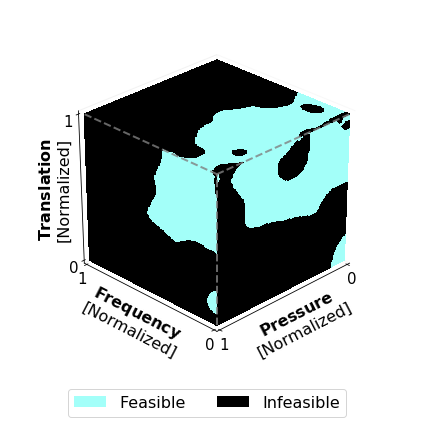

Feasible % space for EI = 34.15


In [12]:
fs=16
fs1=15
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(6,6))
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
# add axes
ax = fig.add_subplot(111,projection='3d')
ax.plot([1,1],[0,1],[1,1],color='grey',zorder=1000,linestyle='--',alpha=0.8,linewidth=2)
ax.plot([1,0],[0,0],[1,1],color='grey',zorder=1000,linestyle='--',alpha=0.8,linewidth=2)
ax.plot([1,1],[0,0],[0,1],color='grey',zorder=1000,linestyle='--',alpha=0.8,linewidth=2)

lev=[-1,-0.9,1]
colr='#a3fff9'
ax.contourf(X1, X2,surf_inf0, lev,alpha=1,offset=1,zdir='z',colors=(colr,'k'),zorder=0)
ax.contourf(surf_inf1, X1, X2, lev,alpha=1,offset=1,zdir='x',colors=(colr,'k'),zorder=0)
ax.contourf(X2, surf_inf2, X1, lev,alpha=1,offset=0,zdir='y',colors=(colr,'k'),zorder=0)
ax.grid(False)
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.view_init(azim=45)
ax.set_xlabel(r'$\bf{Pressure}$'+'\n[Normalized]',fontsize=fs)
ax.set_ylabel(r'$\bf{Frequency}$'+'\n[Normalized]',fontsize=fs)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\bf{Translation}$'+'\n[Normalized]',rotation=90,fontsize=fs)
ax.set_xticks([0,1])
ax.set_xlim([0,1])
ax.set_yticks([0,1])
ax.set_ylim([1,0])
ax.set_zticks([0,1])
ax.set_zlim([0,1])
ax.tick_params(axis='z',labelsize=fs1,pad=0)
ax.tick_params(axis='x',labelsize=fs1,pad=-1)
ax.tick_params(axis='y',labelsize=fs1,pad=-1)
ax.zaxis.labelpad = -1
ax.xaxis.labelpad = 2
ax.yaxis.labelpad = 2
ax.set_frame_on(False)
ax.dist=12

legend_elements = [Patch(facecolor='#a3fff9',label='Feasible'),
                  Patch(facecolor='k',label='Infeasible')]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.85, 0.),prop={'size': fs},ncol=2)
plt.tight_layout()
plt.show()

print('Feasible % space for '+meth+' = '+str(100*(np.sum(surf_inf0==-1)+np.sum(surf_inf1==-1)+np.sum(surf_inf2==-1))/(np.sum(np.abs(surf_inf0))+np.sum(np.abs(surf_inf1))+np.sum(np.abs(surf_inf2)))))

C:\Users\alexs\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


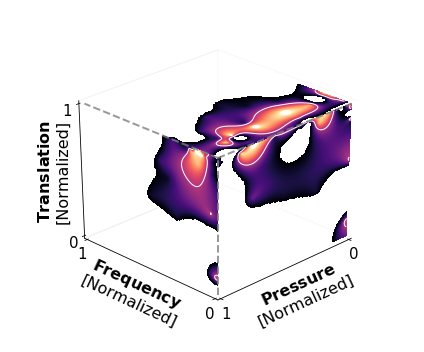

In [13]:
fs=16
fs1=15
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(6,5))
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
# add axes
ax = fig.add_subplot(111,projection='3d')
ax.plot([1,1],[0,1],[1,1],color='grey',zorder=1000,linestyle='--',alpha=0.8,linewidth=2)
ax.plot([1,0],[0,0],[1,1],color='grey',zorder=1000,linestyle='--',alpha=0.8,linewidth=2)
ax.plot([1,1],[0,0],[0,1],color='grey',zorder=1000,linestyle='--',alpha=0.8,linewidth=2)

vmin=0.4
vmax=feas
lev=np.linspace(vmin,vmax,100)
clev=np.linspace(vmin,vmax,3)
pl=ax.contourf(X1, X2,surf_f0, lev,alpha=1,offset=1,zdir='z',zorder=0,cmap='magma_r',vmin=vmin,vmax=vmax, antialiased=False)
ax.contour(X1, X2,surf_f0, clev,offset=1,zdir='z',colors='w',linewidths=1)
ax.contourf(surf_f1, X1, X2, lev,alpha=1,offset=1,zdir='x',zorder=0,cmap='magma_r',vmin=vmin,vmax=vmax, antialiased=False)
ax.contour(surf_f1, X1,X2,clev, offset=1,zdir='x',colors='w',linewidths=1)
ax.contourf(X2, surf_f2, X1, lev,alpha=1,offset=0,zdir='y',zorder=0,cmap='magma_r',vmin=vmin,vmax=vmax, antialiased=False)
ax.contour(X2, surf_f2,X1,clev, offset=0,zdir='y',colors='w',linewidths=1)
ax.grid(False)
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.view_init(azim=45)
ax.set_xlabel(r'$\bf{Pressure}$'+'\n[Normalized]',fontsize=fs)
ax.set_ylabel(r'$\bf{Frequency}$'+'\n[Normalized]',fontsize=fs)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\bf{Translation}$'+'\n[Normalized]',rotation=90,fontsize=fs)
ax.set_xticks([0,1])
ax.set_xlim([0,1])
ax.set_yticks([0,1])
ax.set_ylim([1,0])
ax.set_zticks([0,1])
ax.set_zlim([0,1])
ax.tick_params(axis='z',labelsize=fs1,pad=0)
ax.tick_params(axis='x',labelsize=fs1,pad=-1)
ax.tick_params(axis='y',labelsize=fs1,pad=-1)
ax.zaxis.labelpad = -1
ax.xaxis.labelpad = 2
ax.yaxis.labelpad = 2
ax.set_frame_on(False)
ax.dist=12
plt.tight_layout()
plt.show()

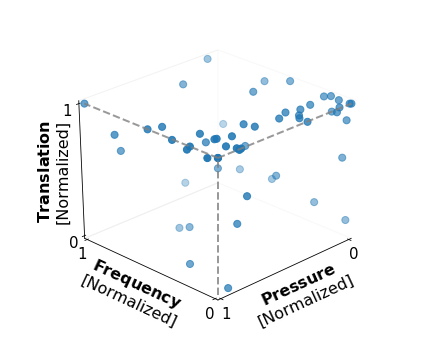

In [14]:
fs=16
fs1=15
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(6,5))
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
# add axes
ax = fig.add_subplot(111,projection='3d')
ax.plot([1,1],[0,1],[1,1],color='grey',zorder=1000,linestyle='--',alpha=0.8,linewidth=2)
ax.plot([1,0],[0,0],[1,1],color='grey',zorder=1000,linestyle='--',alpha=0.8,linewidth=2)
ax.plot([1,1],[0,0],[0,1],color='grey',zorder=1000,linestyle='--',alpha=0.8,linewidth=2)

vmin=0.35
vmax=feas
lev=np.linspace(vmin,vmax,100)
clev=np.linspace(vmin,vmax,3)
ax.scatter(cv_x_tem['Pressure'],cv_x_tem['Frequency'],cv_x_tem['Speed'],s=50)
ax.grid(False)
ax.w_xaxis.pane.fill = False
ax.w_yaxis.pane.fill = False
ax.w_zaxis.pane.fill = False
ax.view_init(azim=45)
ax.set_xlabel(r'$\bf{Pressure}$'+'\n[Normalized]',fontsize=fs)
ax.set_ylabel(r'$\bf{Frequency}$'+'\n[Normalized]',fontsize=fs)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\bf{Translation}$'+'\n[Normalized]',rotation=90,fontsize=fs)
ax.set_xticks([0,1])
ax.set_xlim([0,1])
ax.set_yticks([0,1])
ax.set_ylim([1,0])
ax.set_zticks([0,1])
ax.set_zlim([0,1])
ax.tick_params(axis='z',labelsize=fs1,pad=0)
ax.tick_params(axis='x',labelsize=fs1,pad=-1)
ax.tick_params(axis='y',labelsize=fs1,pad=-1)
ax.zaxis.labelpad = -1
ax.xaxis.labelpad = 2
ax.yaxis.labelpad = 2
ax.set_frame_on(False)
ax.dist=12

plt.tight_layout()
plt.show()

# Microfluidics Figures

Text(67, -0.35, '$\\bf{Batch\\ 4}$')

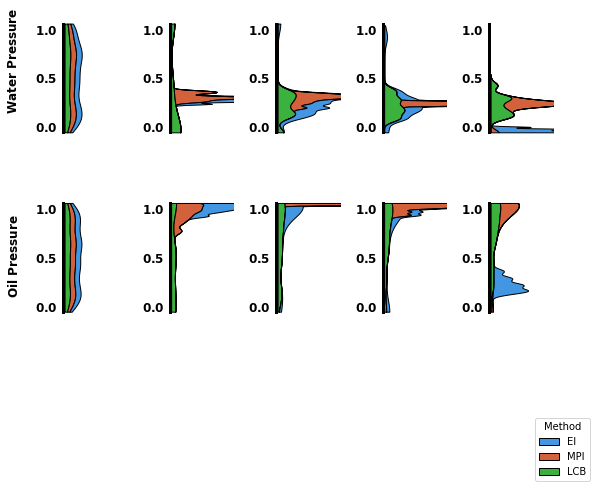

In [15]:
fig = plt.figure(figsize=(9.5, 5.5))

gs = fig.add_gridspec(2, 4*5)
gs.update(hspace=0.5,wspace=0.1)
dmin=-2.7
dlim=4
pal = ['#147edb','#c93b0c','#0b9e0e'] # EI, MPI, LCB
init_set=4 # grid spaces used for initialization round
optim_set=4 # grid spaces used for optimization round
inita=0
optima=0
rounds=['Initialization','Round 1','Round 2','Round 3', 'Round 4']
var=['Water Pressure','Oil Pressure']
l=['p','f']

for u in range(5):
    if u > 0:
        inita=1
    if u > 1:
        optima+=1
    lower=init_set*inita+optima*optim_set
    upper=init_set+u*optim_set

    globals()['r'+str(u)]=bom.loc[bo['Round']==rounds[u],:]
    # position [0,u]
    if u == 0:
        globals()['p1'+str(u)]= fig.add_subplot(gs[0, lower:upper])
    else:
        globals()['p1'+str(u)]= fig.add_subplot(gs[0, lower:upper],sharey=p10)
    globals()['p1'+str(u)].axis('off')
    globals()['p2'+str(u)] = fig.add_subplot(gs[0, lower:upper-1],sharey=p10)
    globals()['p2'+str(u)].patch.set_alpha(0.0)
    globals()['p2'+str(u)].axis('off')
    s1=sns.kdeplot(data=globals()['r'+str(u)],y='WaterPressure',ax=globals()['p1'+str(u)],hue='Method',palette=pal,fill=True,alpha=0.8,clip=[0.,1.],multiple='stack',bw_adjust=0.5)
    s1.legend_.remove()
    globals()['p1'+str(u)].set_xlim([dmin,dlim])
    globals()['p2'+str(u)].set_xlim([-3.5,9])
    globals()['p1'+str(u)].plot((-0.1,-0.1),(0,1),c='k',linewidth=3)
    globals()['p2'+str(u)].text(-1.5,0,r'$\bf{0.0}$',fontsize=12)
    globals()['p2'+str(u)].text(-1.5,0.9,r'$\bf{1.0}$',fontsize=12)
    globals()['p2'+str(u)].text(-1.5,0.45,r'$\bf{0.5}$',fontsize=12)
    
    # position [1,u]
    if u == 0:
        globals()['f1'+str(u)]= fig.add_subplot(gs[1, lower:upper])
    else:
        globals()['f1'+str(u)]= fig.add_subplot(gs[1, lower:upper],sharey=f10)
    globals()['f1'+str(u)].axis('off')
    globals()['f2'+str(u)] = fig.add_subplot(gs[1, lower:upper-1],sharey=f10)
    globals()['f2'+str(u)].patch.set_alpha(0.0)
    globals()['f2'+str(u)].axis('off')
    s2=sns.kdeplot(data=globals()['r'+str(u)],y='OilPressure',ax=globals()['f1'+str(u)],hue='Method',palette=pal,fill=True,alpha=0.8,clip=[0.,1.],multiple='stack',bw_adjust=0.5)
    if u > 0:
        s2.legend_.remove()
    else:
        s2.legend_.set_bbox_to_anchor((5.5, -0.8))
    globals()['f1'+str(u)].set_xlim([dmin,dlim])
    globals()['f2'+str(u)].set_xlim([-3.5,9])
    globals()['f1'+str(u)].plot((-0.1,-0.1),(0,1),c='k',linewidth=3)
    globals()['f2'+str(u)].text(-1.5,0,r'$\bf{0.0}$',fontsize=12)
    globals()['f2'+str(u)].text(-1.5,0.9,r'$\bf{1.0}$',fontsize=12)
    globals()['f2'+str(u)].text(-1.5,0.45,r'$\bf{0.5}$',fontsize=12)

# plot text
p20.text(-6,0.20,r'$\bf{Water\ Pressure}$',fontsize=12,rotation=90)
f20.text(-6,0.15,r'$\bf{Oil\ Pressure}$',fontsize=12,rotation=90)
s20.text(-6,-0.35,r'$\bf{Initialization}$',fontsize=12)
s20.text(16,-0.35,r'$\bf{Batch\ 1}$',fontsize=12)
s20.text(33,-0.35,r'$\bf{Batch\ 2}$',fontsize=12)
s20.text(50,-0.35,r'$\bf{Batch\ 3}$',fontsize=12)
s20.text(67,-0.35,r'$\bf{Batch\ 4}$',fontsize=12)

In [16]:
cv_x_tem=bom.loc[:,['WaterPressure','OilPressure','Method']]
cv_y_tem=bom.loc[:,['Min Function Val']]
meth='EI'
cv_y_tem=cv_y_tem[cv_x_tem['Method']==meth]
cv_x_tem=cv_x_tem[cv_x_tem['Method']==meth]

res=100
x1=np.linspace(0,1,res)
x2=np.linspace(0,1,res)
X1, X2 = np.meshgrid(x1,x2)

feas=0.75 # score threshold for feasibility
for n in range(1):
    cv_x_temp0=np.copy(cv_x_tem.iloc[:,n])
    cv_x_temp1=np.copy(cv_x_tem.iloc[:,(n+1)%2])
    cv_y_temp=np.copy(cv_y_tem.iloc[:,0])
    for i in range(cv_x_tem.shape[0]):
        for j in range(cv_x_tem.shape[0]):
            if cv_x_temp0[i]==cv_x_temp0[j] and cv_x_temp1[i]==cv_x_temp1[j] and i!=j:
                if cv_x_temp0[i] < cv_x_temp0[j]: # want to remove failed prints over good prints
                    cv_x_temp0[j]=np.nan
                    cv_x_temp1[j]=np.nan
                    cv_y_temp[j]=np.nan
                else:
                    cv_x_temp0[i]=np.nan
                    cv_x_temp1[i]=np.nan
                    cv_y_temp[i]=np.nan
    cv_x_temp0=cv_x_temp0[~np.isnan(cv_x_temp0)]
    cv_x_temp1=cv_x_temp1[~np.isnan(cv_x_temp1)]
    cv_y_temp=cv_y_temp[~np.isnan(cv_y_temp)]
    df_rbf=scipy.interpolate.Rbf(cv_x_temp0,cv_x_temp1,cv_y_temp,function='linear')
    globals()['surf_f'+str(n)]=df_rbf(X1,X2)
    globals()['surf_inf'+str(n)]=np.copy(globals()['surf_f'+str(n)])
    globals()['surf_inf'+str(n)][globals()['surf_inf'+str(n)]<feas]=-1 # feasible
    globals()['surf_inf'+str(n)][globals()['surf_inf'+str(n)]>=feas]=1 # infeasible
    globals()['surf_f'+str(n)][globals()['surf_f'+str(n)]>=feas]=np.nan # remove infeasible points from plot

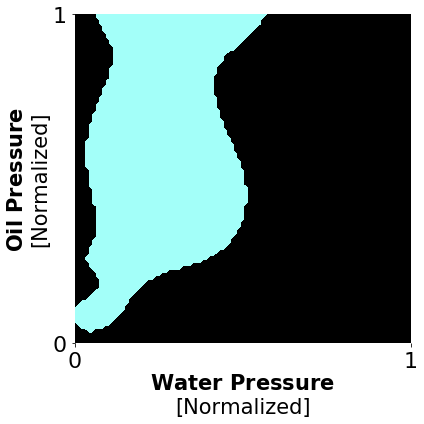

Feasible % space for EI = 34.94


In [17]:
fs=21
fs1=22
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(6,6))
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
lev=[-1,-0.9,1]
colr='#a3fff9'
ax.contourf(X1, X2,surf_inf0, lev,alpha=1,colors=(colr,'k'),zorder=0)
ax.grid(False)
ax.set_xlabel(r'$\bf{Water\ Pressure}$'+'\n[Normalized]',fontsize=fs)
ax.set_ylabel(r'$\bf{Oil\ Pressure}$'+'\n[Normalized]',fontsize=fs)

ax.set_xticks([0,1])
ax.set_xlim([0,1])
ax.set_yticks([0,1])
ax.set_ylim([0,1])
ax.tick_params(axis='x',labelsize=fs1,pad=5)
ax.tick_params(axis='y',labelsize=fs1,pad=5)
ax.xaxis.labelpad = 2
ax.yaxis.labelpad = 2
ax.set_frame_on(False)
ax.dist=12
plt.tight_layout()

# plt.savefig(impath+'feasibility_microf_LCB_R1.png',dpi=300,bbox_inches='tight',transparent=True)
plt.show()

print('Feasible % space for '+meth+' = '+str(100*(np.sum(surf_inf0==-1))/(np.sum(np.abs(surf_inf0)))))

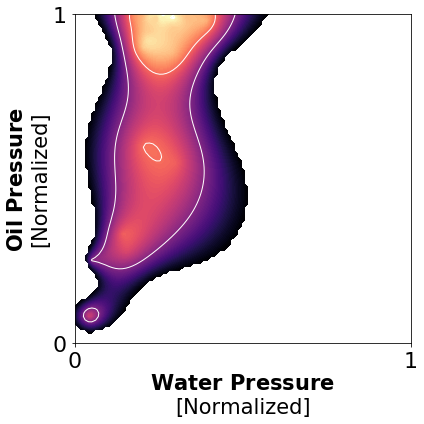

In [18]:
fs=21
fs1=22
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(6,6))
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
vmin=0.1
vmax=feas
lev=np.linspace(vmin,vmax,100)
clev=np.linspace(vmin,0.5,3)
pl=ax.contourf(X1, X2,surf_f0, lev,alpha=1,zorder=0,cmap='magma_r',vmin=vmin,vmax=vmax, antialiased=False)
ax.contour(X1, X2,surf_f0, clev,colors='w',linewidths=1)

ax.grid(False)
ax.set_xlabel(r'$\bf{Water\ Pressure}$'+'\n[Normalized]',fontsize=fs)
ax.set_ylabel(r'$\bf{Oil\ Pressure}$'+'\n[Normalized]',fontsize=fs)

ax.set_xticks([0,1])
ax.set_xlim([0,1])
ax.set_yticks([0,1])
ax.set_ylim([0,1])
ax.tick_params(axis='x',labelsize=fs1,pad=5)
ax.tick_params(axis='y',labelsize=fs1,pad=5)
ax.xaxis.labelpad = 2
ax.yaxis.labelpad = 2
ax.set_frame_on(True)
ax.dist=12
plt.tight_layout()
# plt.savefig(impath+'learned_microf_EI_R1.png',dpi=300,bbox_inches='tight',transparent=True)
plt.show()

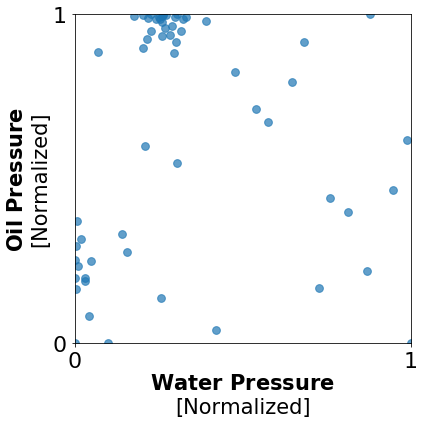

In [14]:
fs=21
fs1=22
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(6,6))
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
ax.scatter(cv_x_tem['WaterPressure'],cv_x_tem['OilPressure'],s=60,alpha=0.7)

ax.grid(False)
ax.set_xlabel(r'$\bf{Water\ Pressure}$'+'\n[Normalized]',fontsize=fs)
ax.set_ylabel(r'$\bf{Oil\ Pressure}$'+'\n[Normalized]',fontsize=fs)

ax.set_xticks([0,1])
ax.set_xlim([0,1])
ax.set_yticks([0,1])
ax.set_ylim([0,1])
ax.tick_params(axis='x',labelsize=fs1,pad=5)
ax.tick_params(axis='y',labelsize=fs1,pad=5)
ax.xaxis.labelpad = 2
ax.yaxis.labelpad = 2
ax.set_frame_on(True)
ax.dist=12
plt.tight_layout()
# plt.savefig(impath+'sample_microf_LCB_R1.png',dpi=300,bbox_inches='tight',transparent=True)
plt.show()

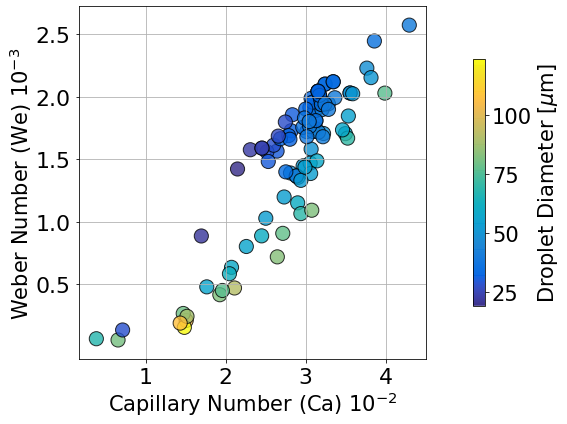

In [37]:
fs=21
fs1=22
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(8,6))
ax.set_frame_on(False)
pl=plt.scatter(cawe_geom['We*10^-3'],cawe_geom['Ca*10^-2'],c=cawe_geom['avg_diam'],cmap=parula_map,s=200,edgecolor='k',alpha=0.8) # swap axes because data is labelled incorrectly

ax.grid(False)
ax.set_xlabel('Capillary Number (Ca) $10^{-2}$',fontsize=fs)
ax.set_ylabel('Weber Number (We) $10^{-3}$',fontsize=fs)
ax.set_yticks([0.5,1.,1.5,2.,2.5])
ax.set_xticks([1.,2.,3.,4.])
ax.tick_params(axis='x',labelsize=fs1,pad=5)
ax.tick_params(axis='y',labelsize=fs1,pad=5)
ax.xaxis.labelpad = 2
ax.yaxis.labelpad = 2
ax.set_frame_on(True)
ax.dist=12

cbar=plt.colorbar(pl,shrink=0.7,pad=0.1)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('Droplet Diameter [$\mu$m]',size=fs)
plt.tight_layout()
plt.grid()
# plt.savefig(impath+'micro_diam_R1.png',dpi=300,bbox_inches='tight',transparent=True)
plt.show()

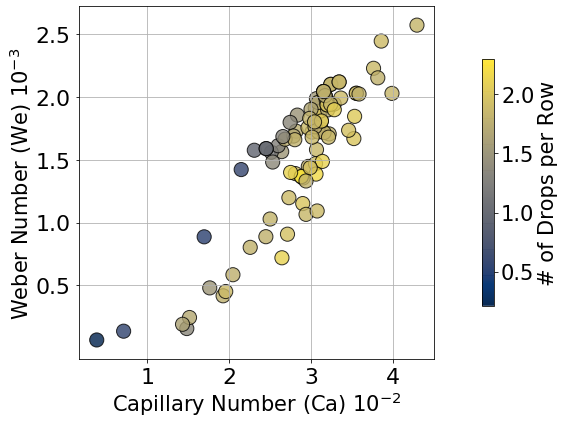

In [36]:
fs=21
fs1=22
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(8,6))
ax.set_frame_on(False)
pl=plt.scatter(cawe_geom['We*10^-3'][103-97:],cawe_geom['Ca*10^-2'][103-97:],c=drops_per_row['drop_avg'],cmap='cividis',s=200,edgecolor='k',alpha=0.8) # swap axes because data is labelled incorrectly

ax.grid(False)
ax.set_xlabel('Capillary Number (Ca) $10^{-2}$',fontsize=fs)
ax.set_ylabel('Weber Number (We) $10^{-3}$',fontsize=fs)
ax.set_yticks([0.5,1.,1.5,2.,2.5])
ax.set_xticks([1.,2.,3.,4.])
ax.tick_params(axis='x',labelsize=fs1,pad=5)
ax.tick_params(axis='y',labelsize=fs1,pad=5)
ax.xaxis.labelpad = 2
ax.yaxis.labelpad = 2
ax.set_frame_on(True)
ax.dist=12

cbar=plt.colorbar(pl,shrink=0.7,pad=0.1)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('# of Drops per Row',size=fs)
plt.tight_layout()
plt.grid()
# plt.savefig(impath+'micro_drops_per_row_R1.png',dpi=300,bbox_inches='tight',transparent=True)
plt.show()

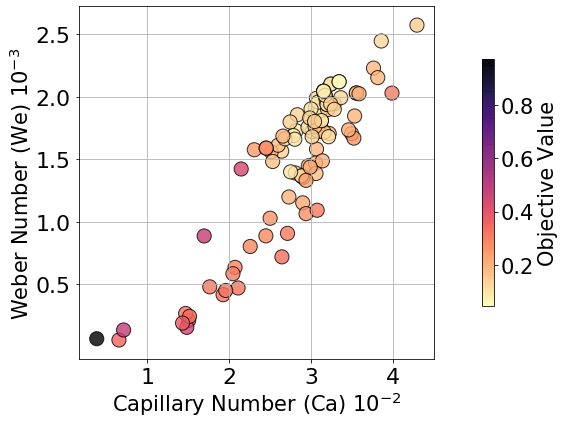

In [38]:
fs=21
fs1=22
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(8,6))
ax.set_frame_on(False)
pl=plt.scatter(cawe_geom['We*10^-3'],cawe_geom['Ca*10^-2'],c=cawe_geom['objective'],cmap='magma_r',s=200,edgecolor='k',alpha=0.8) # swap axes because data is labelled incorrectly

ax.grid(False)
ax.set_xlabel('Capillary Number (Ca) $10^{-2}$',fontsize=fs)
ax.set_ylabel('Weber Number (We) $10^{-3}$',fontsize=fs)
ax.set_yticks([0.5,1.,1.5,2.,2.5])
ax.set_xticks([1.,2.,3.,4.])
ax.tick_params(axis='x',labelsize=fs1,pad=5)
ax.tick_params(axis='y',labelsize=fs1,pad=5)
ax.xaxis.labelpad = 2
ax.yaxis.labelpad = 2
ax.set_frame_on(True)
ax.dist=12

cbar=plt.colorbar(pl,shrink=0.7,pad=0.1)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('Objective Value',size=fs)
plt.tight_layout()
plt.grid()
# plt.savefig(impath+'CaWe_numbers_R2.png',dpi=300,bbox_inches='tight',transparent=True)
plt.show()

# Minimum Objective Value

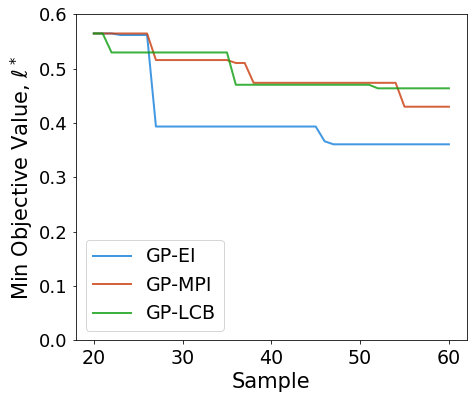

In [146]:
fs=21
fs1=19
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(7,6))

x_plot=np.arange(20,61,1)
plt.plot(x_plot,boEI_min[20:],label='GP-EI',c=pal[0],linewidth=2,alpha=0.8)
plt.plot(x_plot,boMPI_min[20:],label='GP-MPI',c=pal[1],linewidth=2,alpha=0.8)
plt.plot(x_plot,boLCB_min[20:],label='GP-LCB',c=pal[2],linewidth=2,alpha=0.8)
plt.legend(prop={'size':fs1})
plt.ylabel('Min Objective Value, $\ell^*$',fontsize=fs)
plt.xlabel('Sample',fontsize=fs)
ax.tick_params(axis='x',labelsize=fs1,pad=5)
ax.tick_params(axis='y',labelsize=fs1-1,pad=5)
plt.ylim([0.,0.6])
# plt.savefig(impath+'inkjet_minval_R2.png',dpi=300,bbox_inches='tight')
plt.show()


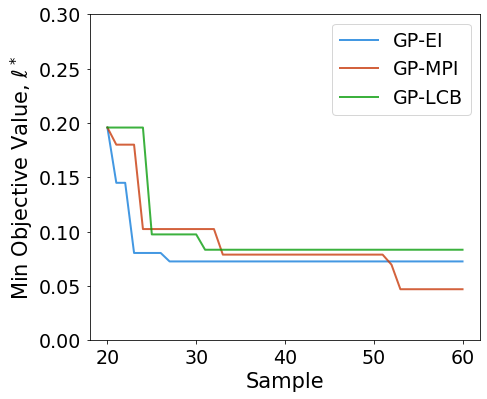

In [140]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(7,6))

x_plot=np.arange(20,61,1)
plt.plot(x_plot,bomEI_min[20:],label='GP-EI',c=pal[0],linewidth=2,alpha=0.8)
plt.plot(x_plot,bomMPI_min[20:],label='GP-MPI',c=pal[1],linewidth=2,alpha=0.8)
plt.plot(x_plot,bomLCB_min[20:],label='GP-LCB',c=pal[2],linewidth=2,alpha=0.8)
plt.legend(prop={'size':fs1})
plt.ylabel('Min Objective Value, $\ell^*$',fontsize=fs)
plt.xlabel('Sample',fontsize=fs)
ax.tick_params(axis='x',labelsize=fs1,pad=5)
ax.tick_params(axis='y',labelsize=fs1,pad=5)
plt.ylim([0,0.3])
# plt.savefig(impath+'micro_minval_R2.png',dpi=300,bbox_inches='tight')
plt.show()


In [36]:
# compute interpolation field for all 3 runs
res=100
x1=np.linspace(0,1,res)
x2=np.linspace(0,1,res)
X1, X2 = np.meshgrid(x1,x2)

cv_x_tem=bo.loc[:,['Pressure','Frequency','Speed','Method']]
cv_y_tem=bo.loc[:,['Min Function Val']]
for n in range(3):
    cv_x_temp0=np.copy(cv_x_tem.iloc[:,n])
    cv_x_temp1=np.copy(cv_x_tem.iloc[:,(n+1)%3])
    cv_y_temp=np.copy(cv_y_tem.iloc[:,0])
    for i in range(cv_x_tem.shape[0]):
        for j in range(cv_x_tem.shape[0]):
            if cv_x_temp0[i]==cv_x_temp0[j] and cv_x_temp1[i]==cv_x_temp1[j] and i!=j:
                if cv_y_temp[i] < cv_y_temp[j]: # want to remove failed prints over good prints
                    cv_x_temp0[j]=np.nan
                    cv_x_temp1[j]=np.nan
                    cv_y_temp[j]=np.nan
                else:
                    cv_x_temp0[i]=np.nan
                    cv_x_temp1[i]=np.nan
                    cv_y_temp[i]=np.nan
    cv_x_temp0=cv_x_temp0[~np.isnan(cv_x_temp0)]
    cv_x_temp1=cv_x_temp1[~np.isnan(cv_x_temp1)]
    cv_y_temp=cv_y_temp[~np.isnan(cv_y_temp)]
    df_rbf=scipy.interpolate.Rbf(cv_x_temp0,cv_x_temp1,cv_y_temp,function='linear')
    globals()['surf_f'+str(n)]=df_rbf(X1,X2)
    
# run random sampling simulation
import random
min_ys_100 = []
for _ in range(3): # take 100 averages
    rand_xs = []
    rand_ys = []
    min_ys = [1]
    for r in range(42):
        rand_x = random.sample(range(0, 100), 3)
        rand_xs.append(rand_x)
        y0 = surf_f0[rand_x[0], rand_x[1]]
        y1 = surf_f1[rand_x[1], rand_x[2]]
        y2 = surf_f2[rand_x[2], rand_x[0]]
        Y = np.min([y0, y1, y2])
        rand_ys.append(Y)
        if r > 0:
            if Y < min_ys[r-1]:
                min_ys.append(Y)
            else:
                min_ys.append(min_ys[r-1])
        min_ys_100.append(min_ys)
        
# get average and bounds of random sampling
min_ys_100_avg = np.mean(np.array(min_ys_100), axis=0)[1:]
min_ys_lower = np.min(np.array(min_ys_100), axis=0)[1:]
min_ys_upper = np.max(np.array(min_ys_100), axis=0)[1:]

# get average and bounds of 3 experimental bo runs
min_bos = np.array([boEI_min[20:],boMPI_min[20:],boLCB_min[20:]])
min_bos_lower = np.min(min_bos, axis=0)
min_bos_upper = np.max(min_bos, axis=0)
min_bos_avg = np.mean(min_bos, axis=0)

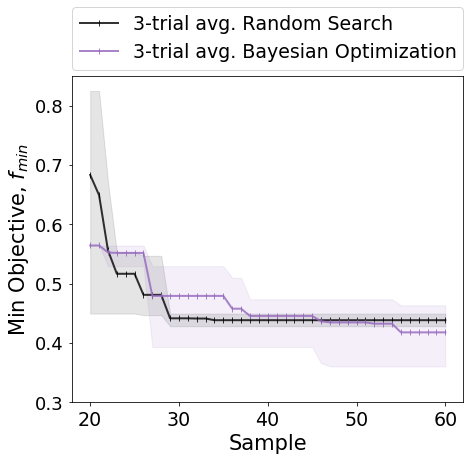

In [37]:
fs=21
fs1=19
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(7,6))

x_plot=np.arange(20,61,1)
plt.fill_between(x_plot, min_ys_lower, min_ys_upper, color='k', alpha=0.1)
plt.plot(x_plot,min_ys_100_avg,label='3-trial avg. Random Search',c='k',linewidth=2,alpha=0.8, marker='|')

plt.fill_between(x_plot, min_bos_lower, min_bos_upper, color='#9467bd', alpha=0.1)
plt.plot(x_plot,min_bos_avg,label='3-trial avg. Bayesian Optimization',c='#9467bd',linewidth=2,alpha=0.8, marker='|')

plt.legend(prop={'size':fs1}, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0.)
plt.ylabel('Min Objective, $f_{min}$',fontsize=fs)
plt.xlabel('Sample',fontsize=fs)
ax.tick_params(axis='x',labelsize=fs1,pad=5)
ax.tick_params(axis='y',labelsize=fs1-1,pad=5)
plt.ylim([0.3,0.85])
# plt.savefig(impath+'drops-bo-vs-rand1.png',dpi=300,bbox_inches='tight')
plt.show()


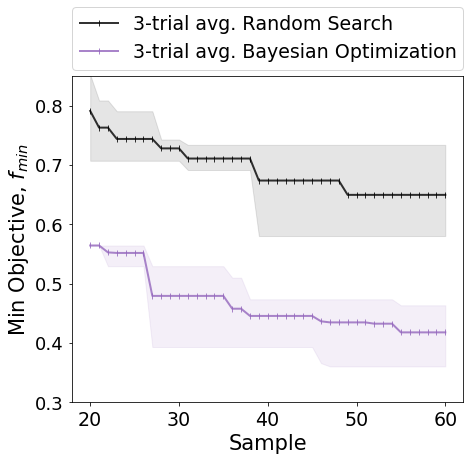

In [24]:
fs=21
fs1=19
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(7,6))

x_plot=np.arange(20,61,1)
plt.fill_between(x_plot, min_ys_lower, min_ys_upper, color='k', alpha=0.1)
plt.plot(x_plot,min_ys_100_avg,label='3-trial avg. Random Search',c='k',linewidth=2,alpha=0.8, marker='|')

plt.fill_between(x_plot, min_bos_lower, min_bos_upper, color='#9467bd', alpha=0.1)
plt.plot(x_plot,min_bos_avg,label='3-trial avg. Bayesian Optimization',c='#9467bd',linewidth=2,alpha=0.8, marker='|')

plt.legend(prop={'size':fs1}, bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=1, mode="expand", borderaxespad=0.)
plt.ylabel('Min Objective, $f_{min}$',fontsize=fs)
plt.xlabel('Sample',fontsize=fs)
ax.tick_params(axis='x',labelsize=fs1,pad=5)
ax.tick_params(axis='y',labelsize=fs1-1,pad=5)
plt.ylim([0.3,0.85])
# plt.savefig(impath+'drops-bo-vs-rand1.png',dpi=300,bbox_inches='tight')
plt.show()


In [27]:
print(min_ys_100_avg, '\n\n',min_bos_avg)

[0.79132168 0.76319044 0.76319044 0.74408939 0.74408939 0.74408939
 0.74408939 0.74408939 0.72817427 0.72817427 0.72817427 0.71105301
 0.71105301 0.71105301 0.71105301 0.71105301 0.71105301 0.71105301
 0.71105301 0.67393691 0.67393691 0.67393691 0.67393691 0.67393691
 0.67393691 0.67393691 0.67393691 0.67393691 0.67393691 0.64979321
 0.64979321 0.64979321 0.64979321 0.64979321 0.64979321 0.64979321
 0.64979321 0.64979321 0.64979321 0.64979321 0.64979321] 

 [0.56443807 0.56443807 0.55278958 0.5518436  0.5518436  0.5518436
 0.5518436  0.4794215  0.4794215  0.4794215  0.4794215  0.4794215
 0.4794215  0.4794215  0.4794215  0.4794215  0.45781856 0.45781856
 0.44565071 0.44565071 0.44565071 0.44565071 0.44565071 0.44565071
 0.44565071 0.44565071 0.43659805 0.43474794 0.43474794 0.43474794
 0.43474794 0.43474794 0.43257032 0.43257032 0.43257032 0.41791894
 0.41791894 0.41791894 0.41791894 0.41791894 0.41791894]


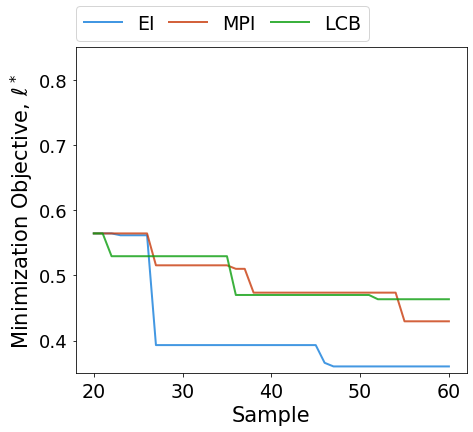

In [157]:
fs=21
fs1=19
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(7,6))

x_plot=np.arange(20,61,1)
plt.plot(x_plot,boEI_min[20:],label='EI',c=pal[0],linewidth=2,alpha=0.8)
plt.plot(x_plot,boMPI_min[20:],label='MPI',c=pal[1],linewidth=2,alpha=0.8)
plt.plot(x_plot,boLCB_min[20:],label='LCB',c=pal[2],linewidth=2,alpha=0.8)
plt.legend(prop={'size':fs1}, bbox_to_anchor=(0., 1.02, 0.75, .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
plt.ylabel('Minimization Objective, $\ell^*$',fontsize=fs)
plt.xlabel('Sample',fontsize=fs)
ax.tick_params(axis='x',labelsize=fs1,pad=5)
ax.tick_params(axis='y',labelsize=fs1-1,pad=5)
plt.ylim([0.35,0.85])
# plt.savefig(impath+'drops-zoom-legend.png',dpi=300,bbox_inches='tight')
plt.show()


# SHAP feature importance

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import shap

In [22]:
bo_notinit=bo[bo['Round']!='Initialization']
# The target variable is 'quality'.
Y = bo_notinit['Min Function Val']
X =  bo_notinit[['Pressure','Frequency','Speed']]
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)
shap_values = shap.TreeExplainer(model).shap_values(X_train)


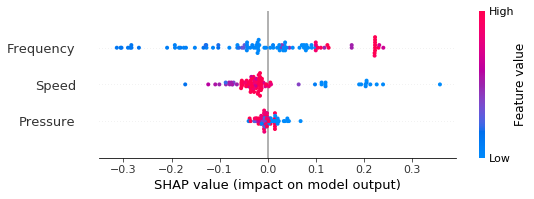

In [23]:
fig = plt.figure()
shap.summary_plot(shap_values, X_train)
# fig.savefig(impath+'shap_vals.png',dpi=300,bbox_inches='tight')

In [24]:
bom_notinit=bom[bom['Round']!='Initialization']
# The target variable is 'quality'.
Y = bom_notinit['Min Function Val']
X =  bom_notinit[['WaterPressure','OilPressure']]
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
# Build the model with the random forest regression algorithm:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)
shap_values = shap.TreeExplainer(model).shap_values(X_train)


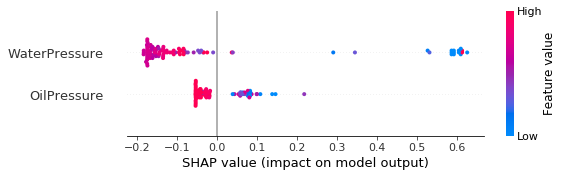

In [25]:
fig = plt.figure()
shap.summary_plot(shap_values, X_train)
# fig.savefig(impath+'shap_micro_vals.png',dpi=300,bbox_inches='tight')